In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

In [2]:
dev1 = qml.device('default.qubit', wires=1)
dev2 = qml.device('default.qubit', wires=2)

In [3]:
qml.drawer.use_style('sketch')

## Basic state

For 1 qubit,
$$
\begin{gathered}
\left| 0 \right> = (1 0) \\
\left| 1 \right> = (0 1)
\end{gathered}
$$

In [4]:
@qml.qnode(dev1)
def zero():
    return qml.probs(wires=0)

@qml.qnode(dev1)
def one():
    qml.PauliX(wires=0)
    return qml.probs(wires=0)

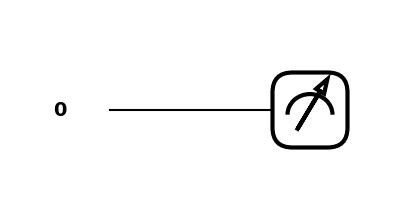

In [5]:
fig, ax = qml.draw_mpl(zero)()
plt.show()

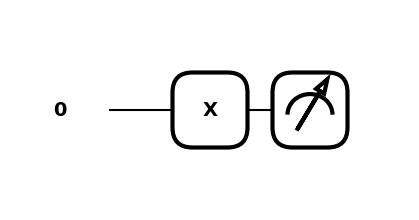

In [6]:
fig, ax = qml.draw_mpl(one)()
plt.show()

In [7]:
zero()

tensor([1., 0.], requires_grad=True)

In [8]:
one()

tensor([0., 1.], requires_grad=True)

For 2 qubit,

$$
\begin{gathered}
\left| 00 \right> = (1 0 0 0) \\
\left| 01 \right> = (0 1 0 0) \\
\left| 10 \right> = (0 0 1 0) \\
\left| 11 \right> = (0 0 0 1)
\end{gathered}
$$

In [9]:
@qml.qnode(dev2)
def zerozero():
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def zeroone():
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def onezero():
    qml.PauliX(wires=0)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def oneone():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

In [10]:
zerozero()

tensor([1., 0., 0., 0.], requires_grad=True)

In [11]:
zeroone()

tensor([0., 1., 0., 0.], requires_grad=True)

In [12]:
onezero()

tensor([0., 0., 1., 0.], requires_grad=True)

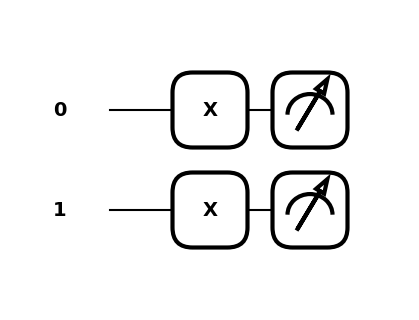

In [13]:
fig, ax = qml.draw_mpl(oneone)()
plt.show()

In [14]:
oneone()

tensor([0., 0., 0., 1.], requires_grad=True)

## Hadamard Gate

$$
H\left|x\right> = \frac{1}{\sqrt{2}}\left(\left|0\right> + (-1)^x \left|1\right>\right)
$$

In [15]:
@qml.qnode(dev1)
def hadamard_gate(x):
    qml.BasisStatePreparation(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

In [16]:
x_zero = [0]
x_one  = [1]

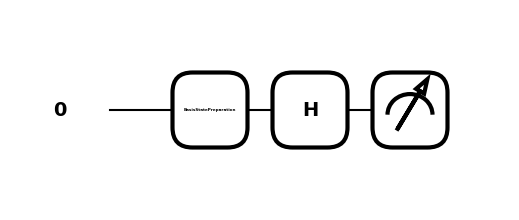

In [17]:
fig, ax = qml.draw_mpl(hadamard_gate)(x_zero)
plt.show()

In [18]:
hadamard_gate(x_zero)

tensor([0.5, 0.5], requires_grad=True)

In [19]:
hadamard_gate(x_one)

tensor([0.5, 0.5], requires_grad=True)

In [20]:
@qml.qnode(dev1)
def hadamard_gate_comp(x):
    x = x / np.linalg.norm(x)
    qml.QubitStateVector(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.probs(wires=0)

In [21]:
x_zero = [1, 0]
x_one  = [0, 1]
x_mix1 = [1, 1]
x_mix2 = [1,-1]

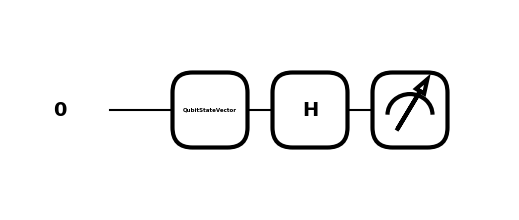

In [24]:
fig, ax = qml.draw_mpl(hadamard_gate_comp)(x_mix1)
plt.show()

In [25]:
hadamard_gate_comp(x_zero)

tensor([0.5, 0.5], requires_grad=True)

In [26]:
hadamard_gate_comp(x_one)

tensor([0.5, 0.5], requires_grad=True)

In [27]:
hadamard_gate_comp(x_mix1)

tensor([1., 0.], requires_grad=True)

In [28]:
hadamard_gate_comp(x_mix2)

tensor([0., 1.], requires_grad=True)

### Same probability does not mean same state

In [29]:
@qml.qnode(dev1)
def hadamard_comp_state(x):
    x = x / np.linalg.norm(x)
    qml.QubitStateVector(x, wires=[0])
    qml.Hadamard(wires=0)
    return qml.state()

In [30]:
hadamard_comp_state(x_zero)

tensor([0.70710678+0.j, 0.70710678+0.j], requires_grad=True)

In [31]:
hadamard_comp_state(x_one)

tensor([ 0.70710678+0.j, -0.70710678+0.j], requires_grad=True)

## CNOT Gate

In [34]:
@qml.qnode(dev2)
def cnot_gate(x):
    qml.BasisStatePreparation(x, wires=[0,1])
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=[0,1])

In [37]:
x_00 = [0, 0]
x_01 = [0, 1]
x_10 = [1, 0]
x_11 = [1, 1]

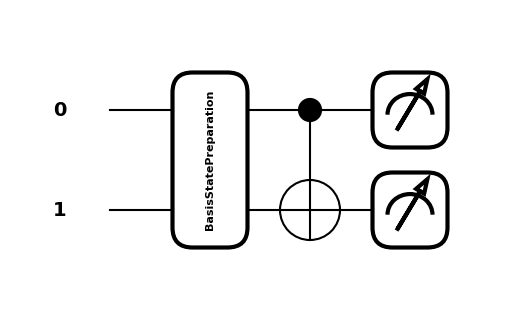

In [38]:
fig, ax = qml.draw_mpl(cnot_gate)(x_00)
plt.show()

In [40]:
[print(x, cnot_gate(x)) for x in [x_00, x_01, x_10, x_11]];

[0, 0] [1. 0. 0. 0.]
[0, 1] [0. 1. 0. 0.]
[1, 0] [0. 0. 0. 1.]
[1, 1] [0. 0. 1. 0.]


## SWAP Gate

In [41]:
@qml.qnode(dev2)
def swap_gate(x):
    qml.BasisStatePreparation(x, wires=[0,1])
    qml.SWAP(wires=[0,1])
    return qml.probs(wires=[0,1])

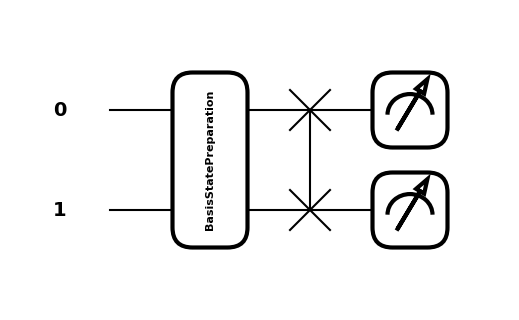

In [42]:
fig, ax = qml.draw_mpl(swap_gate)(x_00)
plt.show()

In [43]:
[print(x, swap_gate(x)) for x in [x_00, x_01, x_10, x_11]];

[0, 0] [1. 0. 0. 0.]
[0, 1] [0. 0. 1. 0.]
[1, 0] [0. 1. 0. 0.]
[1, 1] [0. 0. 0. 1.]


# Adding Custom Operators

## Abstraction

In [46]:
from jax import numpy as jnp
op = qml.Rot(jnp.array(0.1), jnp.array(0.2), jnp.array(0.3), wires=[0])

In [47]:
isinstance(op, qml.operation.Operator)

True

In [48]:
op.name

'Rot'

In [49]:
op.wires

<Wires = [0]>

In [50]:
op.parameters

[Array(0.1, dtype=float32, weak_type=True),
 Array(0.2, dtype=float32, weak_type=True),
 Array(0.3, dtype=float32, weak_type=True)]

In [51]:
op.hyperparameters

{}

In [53]:
op.decomposition()

[RZ(Array(0.1, dtype=float32, weak_type=True), wires=[0]),
 RY(Array(0.2, dtype=float32, weak_type=True), wires=[0]),
 RZ(Array(0.3, dtype=float32, weak_type=True), wires=[0])]

## Creating custom operators

In [58]:
class FlipAndRotate(qml.operation.Operation):
    num_wires = qml.operation.AnyWires
    grad_method = "A"
    
    def __init__(self, angle, wire_rot, wire_flip=None, do_flip=False, do_queue=None, id=None):
        if do_flip and wire_flip is None:
            raise ValueError("Expected a wire to flip; got None")
        
        shape = qml.math.shape(angle)
        if len(shape) > 1:
            raise ValueError(f"Expected a scalar angle; got angle of shape {shape}.")
        
        self._hyperparameters = {
            "do_flip": do_flip
        }
        
        all_wires = qml.wires.Wires(wire_rot) + qml.wires.Wires(wire_flip)
        
        super().__init__(angle, wires=all_wires, do_queue=do_queue, id=id)
        
    @property
    def num_params(self):
        return 1
    
    @staticmethod
    def compute_decomposition(angle, wires, do_flip):
        op_list = []
        if do_flip:
            op_list.append(qml.PauliX(wires=wires[1]))
        op_list.append(qml.RX(angle, wires=wires[0]))
        return op_list
    
    def adjoint(self):
        return FlipAndRotate(-self.parameters[0], self.wires[0], self.wires[1], do_flip=self.hyperparameters["do_flip"])

In [59]:
op = FlipAndRotate(0.1, wire_rot=0, wire_flip=1, do_flip=True)

In [60]:
op

FlipAndRotate(0.1, wires=[0, 1])

In [61]:
op.decomposition()

[PauliX(wires=[1]), RX(0.1, wires=[0])]

In [70]:
@qml.qnode(dev2)
def flip_and_rotate(angle):
    for op in FlipAndRotate(angle, wire_rot=0, wire_flip=1, do_flip=True).decomposition():
        op
    return qml.probs(wires=[0,1])

In [78]:
angle = np.pi / 2

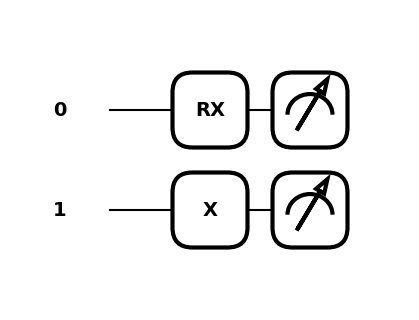

In [79]:
fig, ax = qml.draw_mpl(flip_and_rotate)(angle)
plt.show()

In [80]:
flip_and_rotate(angle)

tensor([0. , 0.5, 0. , 0.5], requires_grad=True)

# Bell State

In [81]:
@qml.qnode(dev2)
def bell_state():
    qml.Hadamard(wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=[0,1])

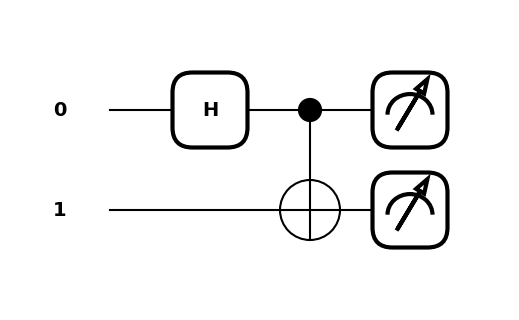

In [82]:
fig, ax = qml.draw_mpl(bell_state)()
plt.show()

In [83]:
bell_state()

tensor([0.5, 0. , 0. , 0.5], requires_grad=True)

In [86]:
@qml.qnode(dev2)
def bell_state_alt(angle):
    qml.RY(angle, wires=0)
    qml.CNOT(wires=[0,1])
    return qml.probs(wires=[0,1])

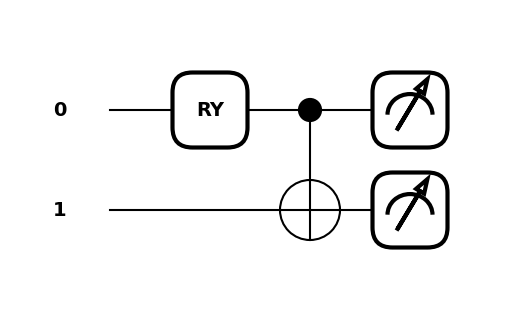

In [88]:
fig, ax = qml.draw_mpl(bell_state_alt)(0)
plt.show()

In [91]:
angle = [0, np.pi / 6, np.pi / 4, np.pi / 3, np.pi / 2, np.pi, np.pi * 2]

for phi in angle:
    print(f"{phi}\t{bell_state_alt(phi)}")

0	[1. 0. 0. 0.]
0.5235987755982988	[0.9330127 0.        0.        0.0669873]
0.7853981633974483	[0.85355339 0.         0.         0.14644661]
1.0471975511965976	[0.75 0.   0.   0.25]
1.5707963267948966	[0.5 0.  0.  0.5]
3.141592653589793	[3.74939946e-33 0.00000000e+00 0.00000000e+00 1.00000000e+00]
6.283185307179586	[1.00000000e+00 0.00000000e+00 0.00000000e+00 1.49975978e-32]


In [92]:
angle = np.linspace(0, np.pi * 2, 100)

p_mat = np.zeros((len(angle), 4))

for i, phi in enumerate(angle):
    p_mat[i,:] = bell_state_alt(phi)[:]

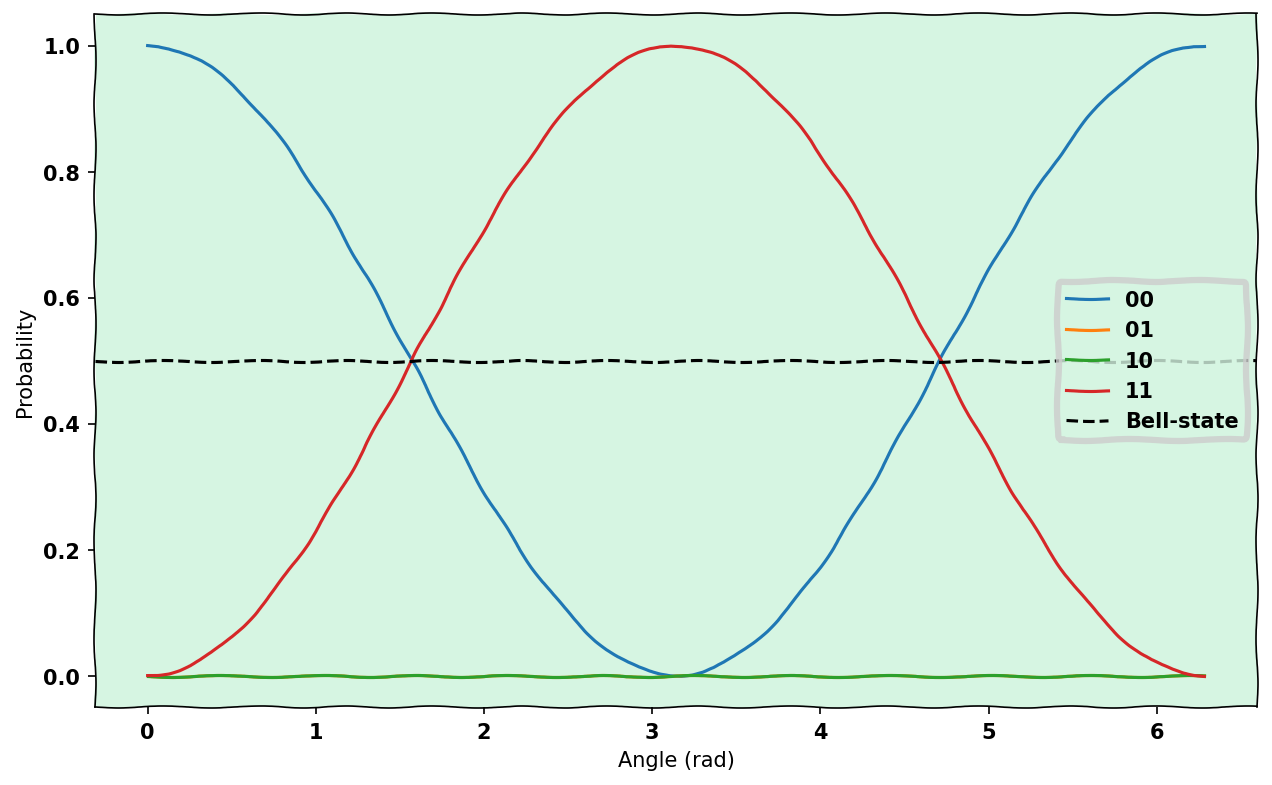

In [96]:
plt.figure(figsize=(10,6), dpi=150)
plt.plot(angle, p_mat[:,0], label="00")
plt.plot(angle, p_mat[:,1], label="01")
plt.plot(angle, p_mat[:,2], label="10")
plt.plot(angle, p_mat[:,3], label="11")
plt.axhline(y=0.5, linestyle='dashed', label='Bell-state')
plt.xlabel("Angle (rad)")
plt.ylabel("Probability")
plt.legend()
plt.show()